# How to analyze your tension test data with `mechtest-ufmg`

Tension tests are extensively used to characterize material's mechanical properties due to its reproducibility and the variety of patameters that can be obtained from a single test. Among the assessed characteristics are apparent modulus of elasticity, yield strength, tensile strength, ductility, toughness and others. These parameters are extremely important to select the right material for a specified use. Therefore, the objective of `mechtest-ufmg` is to provide an easy and reliable way to derive the referred mechanical properties. The following notebook provides an easy and demonstrative way of how to use `mechtest-ufmg`, and it can be used as a template if the user make the correct changes to the code.  


### Importing the necessary packages

In [6]:
import pandas as pd #is used to import the data from files like csv, txt, xlsx, and others.
import  mechtest_ufmg.Tensile_properties as mech #importing the package

## How to import the data

Here we will import data that is at `~/data` folder using pandas.


In [3]:
data = pd.read_csv('data/astm1055.tsv', sep='\t', decimal=',')

strain = data['Strain']
stress = data['Stress']

## Tensile test object initialization

Now we have to initialize our object that will perform the calculations on the input data. 

The mechanical properties are calculated automatically as the object is initialized. Other methods can be used to plot data so it can be easily understood.


In [7]:
steel1 = mech.Tensile_test(strain, stress, specimen_name = 'ASTM 1055')

The minimum data that has to be passed to the `mech.Tensile_test()` are the vectors containing the strain and stress relative to the test. We also passed the name, in this way it is possible to identify which samples are being analyzed. Nevertheless, it is important to highlight that the data can be passed as elongation/load together with the specimen's dimensions and arguments to tell the program that our dataset is not strain/stress data.



## Acessing the properties of our material

The properties that were calculated upon the initialization can be acessed using the dot notation in the form of `object_name.property_name`.

So, lets say that we want to know the apparent modulus of elasticity of our material and its yield stress. We can do it as follows:

### Young modulus

In [8]:
steel1.young_modulus

(151541.64190520704, 152, 30.301837675376653, 0.9850046823166643)

Well... It seems that our computer is crazy. 

What happened here? 

I can answer that.

The young modulus function returns the young modulus in [MPa] units, that is important for other internal calculations. The second term has units of [GPa], and probably is the most appealing way to present our result. The third value is the intercept obtained in the linear regression process, followed by the fourth value that is the R² statistics to provide an idea of the quality of the regression.

If the user wants to store one value to a variable, each one is accessible by its index. As an example: the young modulus in GPa units is accessed by `steel1.young_modulus[1]`.

It is important to highlight that python, as many other programming languages, starts counting at the index 0.


In [9]:
elast_mod_GPa = steel1.young_modulus[1]

elast_mod_GPa

152

### Yield strength

If the user wants to round the values, the function `round()` do it right away.

In [10]:
steel1.yield_strength

sigma_y = steel1.yield_strength

sigma_y

565.69281

In [11]:
round(steel1.yield_strength)

566

The same system is valid for the other properties that can be determined in the stress/strain curve. For the exact name of each one, please look the documentation,

## Plotting graphs from our data

The plot functions can be used as easily as the properties determination. The same dot notation is used, as follows.

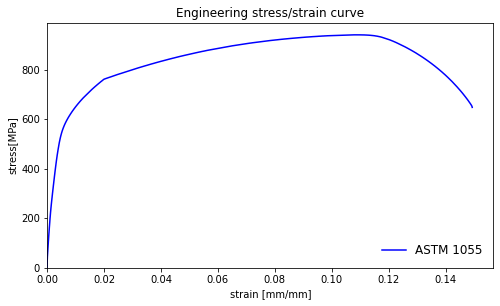

In [12]:
steel1.plot_conventional_curve()

If you want to save your image it is simple as follows.

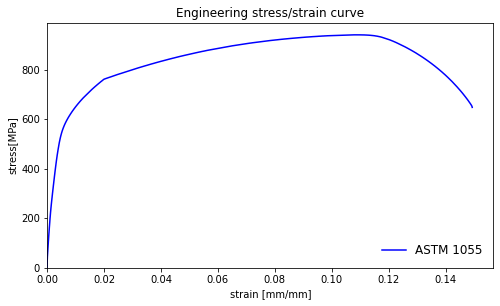

In [13]:
steel1.plot_conventional_curve(save=True)